In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
orderbook = pd.read_csv('orderbook.csv', index_col=0)

In [22]:
orderbook_pearl = orderbook[orderbook['symbol'] == 'PEARLS'].copy()
orderbook_banana = orderbook[orderbook['symbol'] == 'BANANAS'].copy()

In [28]:
orderbook_pearl['mid_price']  = orderbook_pearl.apply(lambda x: (x['bid_1'] + x['ask_1'])/2, axis=1)
orderbook_banana['mid_price'] = orderbook_banana.apply(lambda x: (x['bid_1'] + x['ask_1'])/2, axis=1)

Text(0.5, 1.0, 'BANANAS')

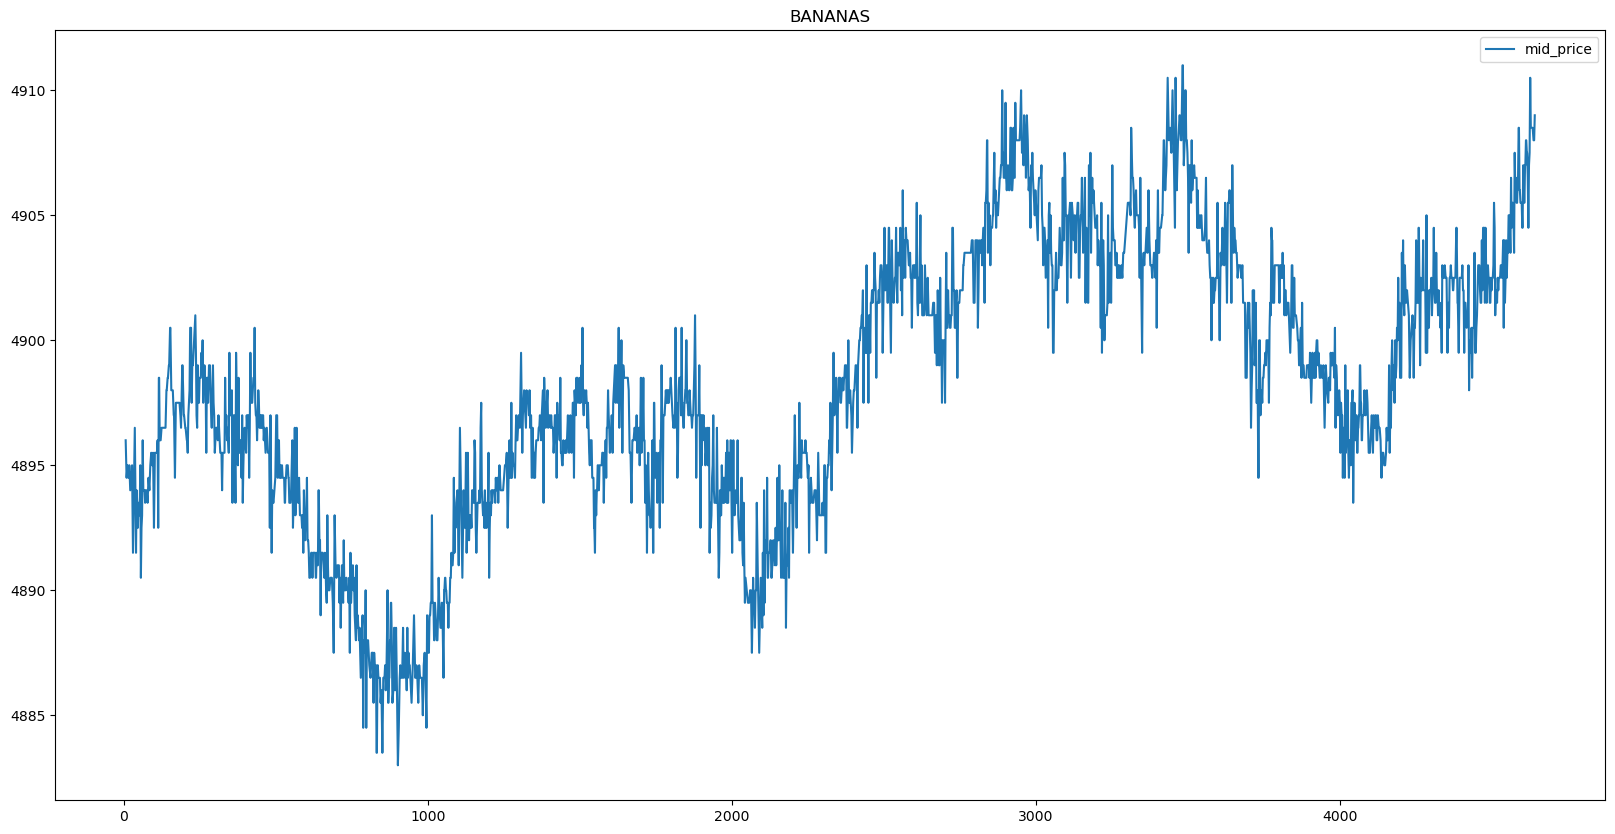

In [30]:
orderbook_banana.plot(y='mid_price', figsize=(20,10))
plt.title('BANANAS')

# trend indicator: MA10 MA30

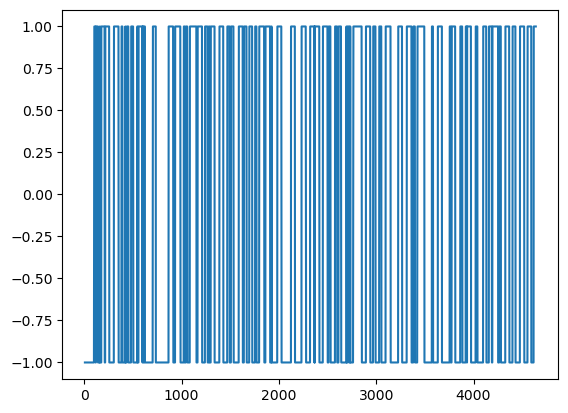

In [92]:
orderbook_banana['tech_ind'] = np.where(orderbook_banana['MA10'] > orderbook_banana['MA30'], 1, -1)
plt.plot(orderbook_banana['tech_ind'])

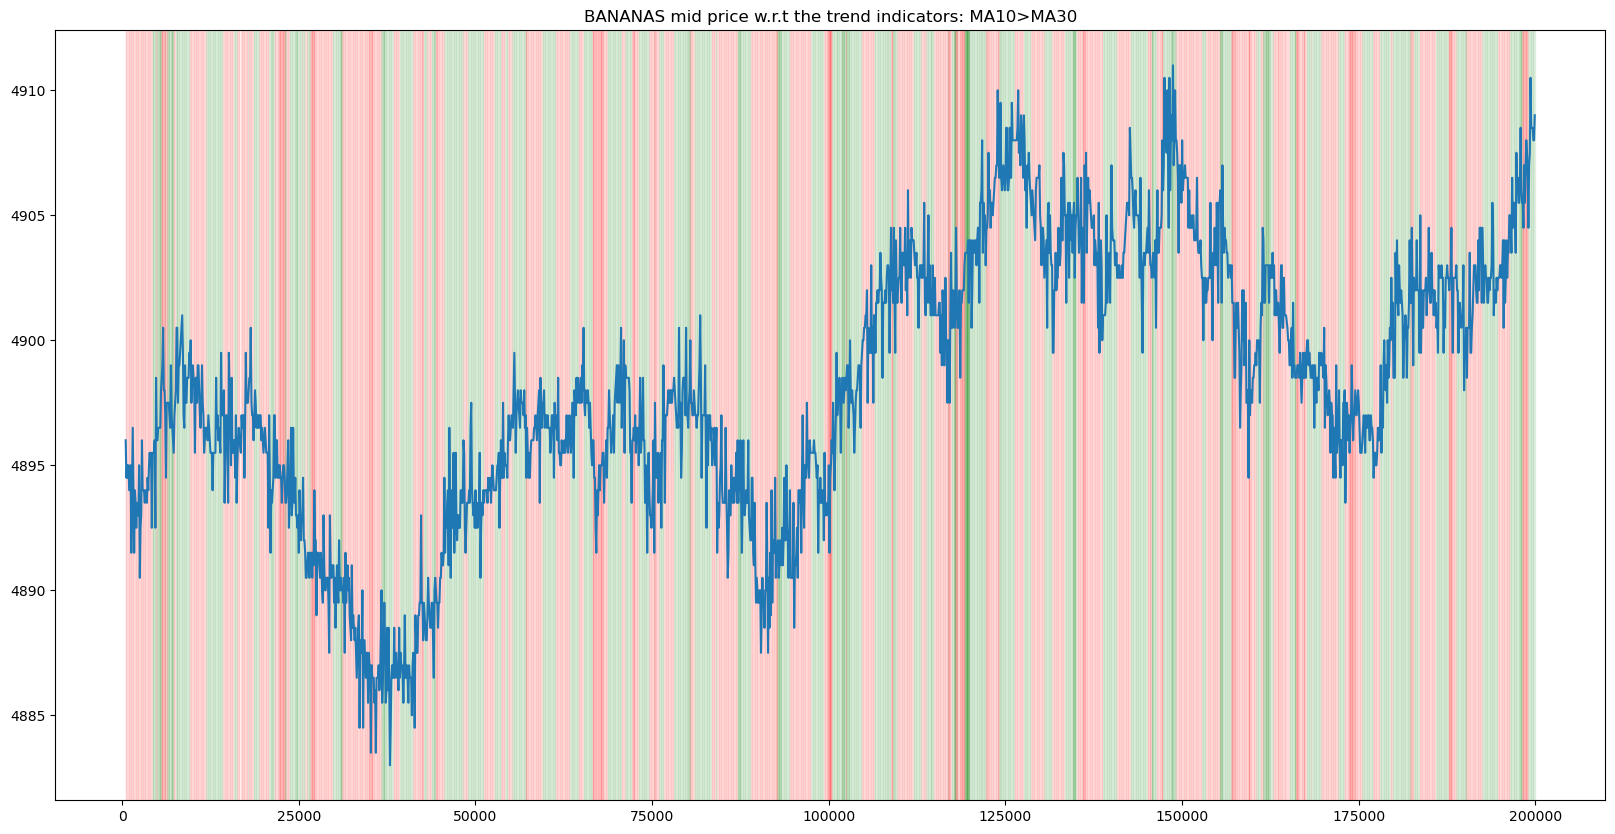

In [95]:
def MA(x, window=5):
    return x.rolling(window).mean()

orderbook_banana['MA10']  = MA(orderbook_banana['mid_price'], window=10)
orderbook_banana['MA30'] = MA(orderbook_banana['mid_price'], window=30)
ax, fig = plt.subplots(figsize=(20,10))
# plt.plot(orderbook_banana['mid_price'])
plt.plot(orderbook_banana['timestamp'], orderbook_banana['mid_price'], label='mid_price')
plt.title('BANANAS mid price w.r.t the trend indicators: MA10>MA30')

for date, row in orderbook_banana.iterrows():
    if row['tech_ind']>0:
        color = 'g'
    else:
        color = 'r'
    plt.axvspan(row['timestamp'], row['timestamp'], color=color, alpha=0.1)

# tech indicator, market imbalance

In [73]:
orderbook_banana.head(5)

,timestamp,symbol,trade_price,trade_size,bid_1,bid_1_size,bid_2,bid_2_size,bid_3,bid_3_size,...,ask_4,ask_4_size,ask_5,ask_5_size,mid_price,MA5,MA10,MA30,tech_ind,volumne inbalance
7,500,BANANAS,4899.0,9.0,4893,24,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4896.0,NaN,NaN,NaN,-1,inf
10,600,BANANAS,4899.0,1.0,4892,26,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4894.5,NaN,NaN,NaN,-1,2.058824
13,700,BANANAS,4899.0,1.0,4892,7,4891.0,27.0,NaN,NaN,...,NaN,NaN,NaN,NaN,4895.0,NaN,NaN,NaN,-1,-1.700000
16,800,BANANAS,4899.0,1.0,4891,26,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4894.5,NaN,NaN,NaN,-1,inf
19,900,BANANAS,4899.0,1.0,4892,2,4891.0,27.0,NaN,NaN,...,NaN,NaN,NaN,NaN,4895.0,4895.0,NaN,NaN,-1,-1.148148


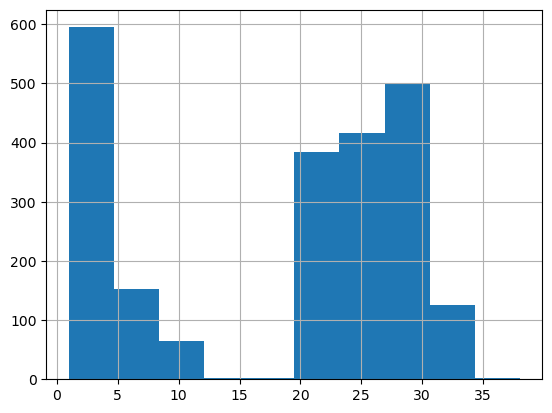

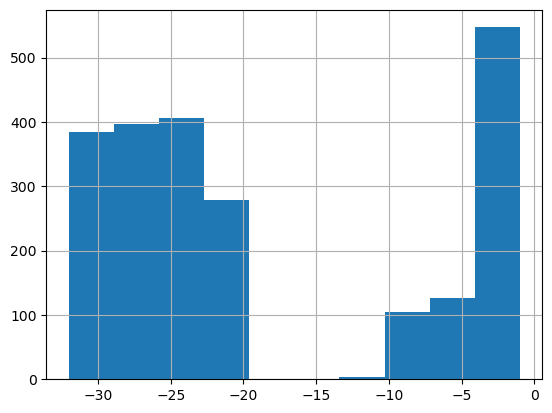

In [75]:
orderbook_banana['bid_1_size'].hist()
plt.show()
orderbook_banana['ask_1_size'].hist()
plt.show()

In [76]:
orderbook_banana['volumne inbalance'] = (orderbook_banana['bid_1_size'] + orderbook_banana['ask_1_size'])/(orderbook_banana['bid_1_size'] -orderbook_banana['ask_1_size'])

In [77]:
orderbook_banana['volumne inbalance'].describe()


count    2246.000000
mean       -0.018885
std         0.606072
min        -0.939394
25%        -0.574675
50%         0.000000
75%         0.515152
max         0.939394
Name: volumne inbalance, dtype: float64

-0.7142857142857143
0.6756756756756757


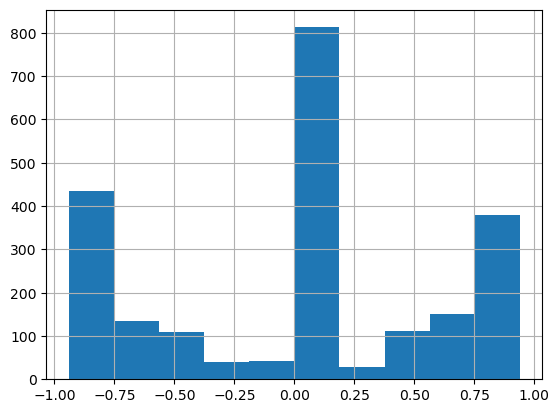

In [96]:
orderbook_banana['volumne inbalance'].hist()
# calculate the quantile of the volume imbalance
print(orderbook_banana['volumne inbalance'].quantile(0.2))
print(orderbook_banana['volumne inbalance'].quantile(0.8))

In [97]:
orderbook_banana['tech ind'] = np.select([orderbook_banana['volumne inbalance'] > 0.7, orderbook_banana['volumne inbalance'] < -0.7], [1, -1], default=0)

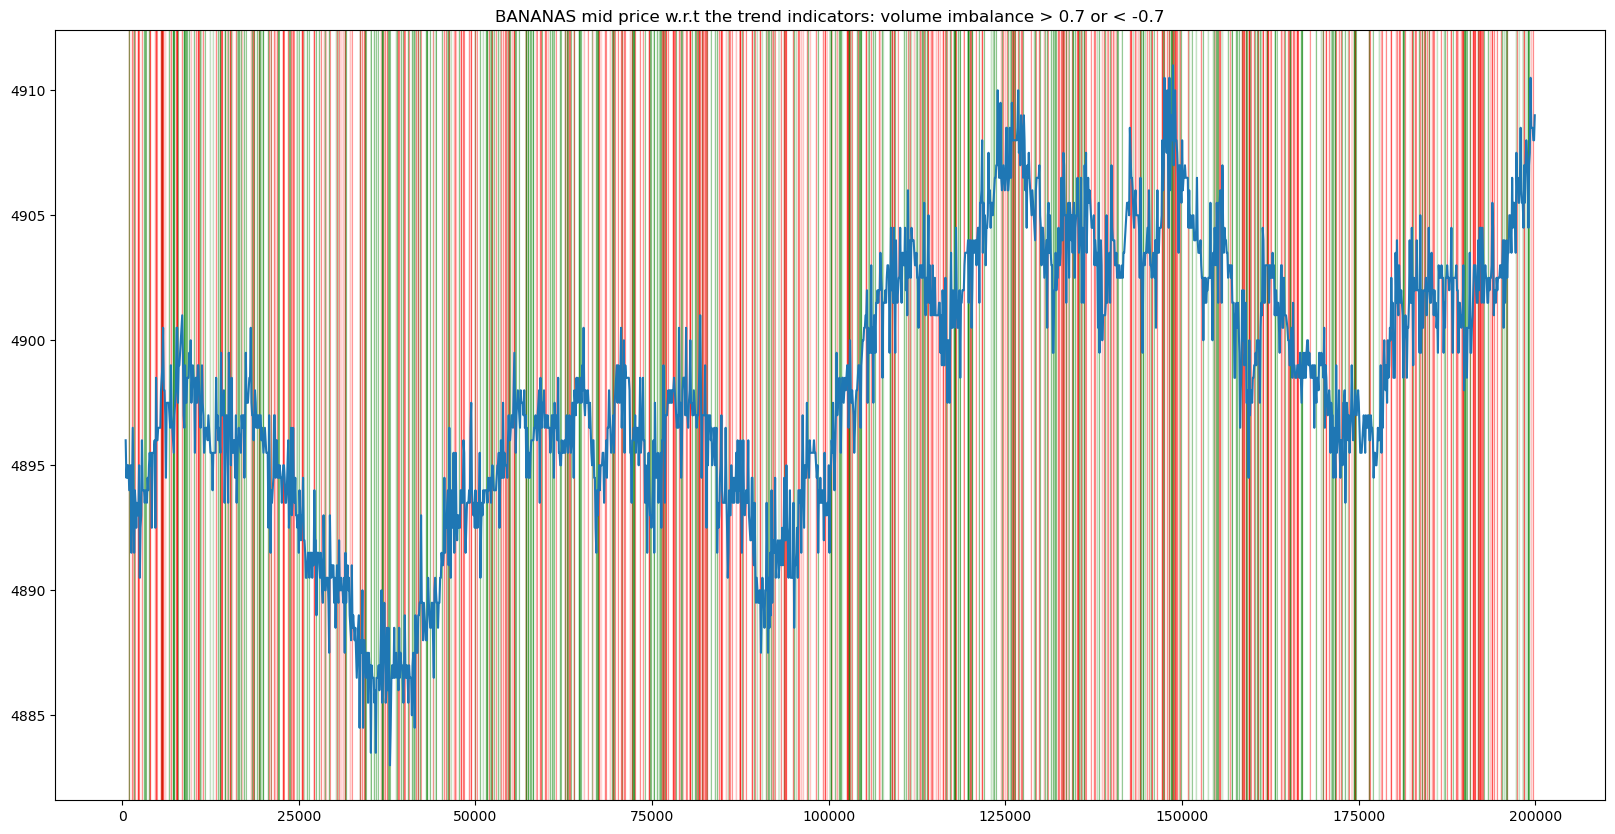

In [98]:
ax, fig = plt.subplots(figsize=(20,10))
# plt.plot(orderbook_banana['mid_price'])
plt.plot(orderbook_banana['timestamp'], orderbook_banana['mid_price'], label='mid_price')

plt.title('BANANAS mid price w.r.t the trend indicators: volume imbalance > 0.7 or < -0.7')

for date, row in orderbook_banana.iterrows():
    if row['tech ind']>0:
        color = 'g'
    elif row['tech ind']<0:
        color = 'r'
    else:
        color = 'white'
    plt.axvspan(row['timestamp'], row['timestamp'], color=color, alpha=0.5)